# STAT 542 Final Project

In [ ]:
def text_clean (text):
    import random
    string_list=['Hmmm....','Depends.','Let us agree to disagree.','Its all a conspiracy','Interesting....']
    if text.strip()=='':
        return random.choice(string_list)
    else :
        return text.capitalize()

In [ ]:
text_clean(' ')

'Its all a conspiracy'

## **Group Members** -  Chirag Ranjan (cranjan2@illinois.edu), Debapratim Ghosh (dg19@illinois.edu), Shantanu Solanki (solanki7@illinois.edu)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
from matplotlib.pyplot import figure
import warnings
from sklearn.manifold import TSNE
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
import lightgbm as lgb

## Loading the data 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_train = pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")
data_train = df_train.drop(['label'], axis = 1)
label_train = df_train['label']

data_test = df_test.drop(['label'], axis = 1)
label_test = df_test['label']

# Unsupervised Learning and Summary Statistics

In [ ]:
df_train.isnull().sum()
df_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:

label_train = label_train.to_frame()
label_train['label'] = label_train['label'].astype('str')
label_test = label_test.to_frame()
label_test['label'] = label_test['label'].astype('str')

In [ ]:
Map = {'0': 'TShirt/Top',
            '1': 'Trouser',
            '2': 'Pullover',
            '3': 'Dress',
            '4': 'Coat',
            '5': 'Sandal',
            '6': 'Shirt',
            '7': 'Sneaker',
            '8': 'Bag',
            '9': 'Ankle Boot'
           }


label_train['category'] = label_train['label'].map(Map)
label_test['category']=label_test['label'].map(Map)

### Frequency of Outcome Variable

[Text(0, 0, '0.0'),
 Text(0, 0, '200.0'),
 Text(0, 0, '400.0'),
 Text(0, 0, '600.0'),
 Text(0, 0, '800.0'),
 Text(0, 0, '1000.0'),
 Text(0, 0, '1200.0')]

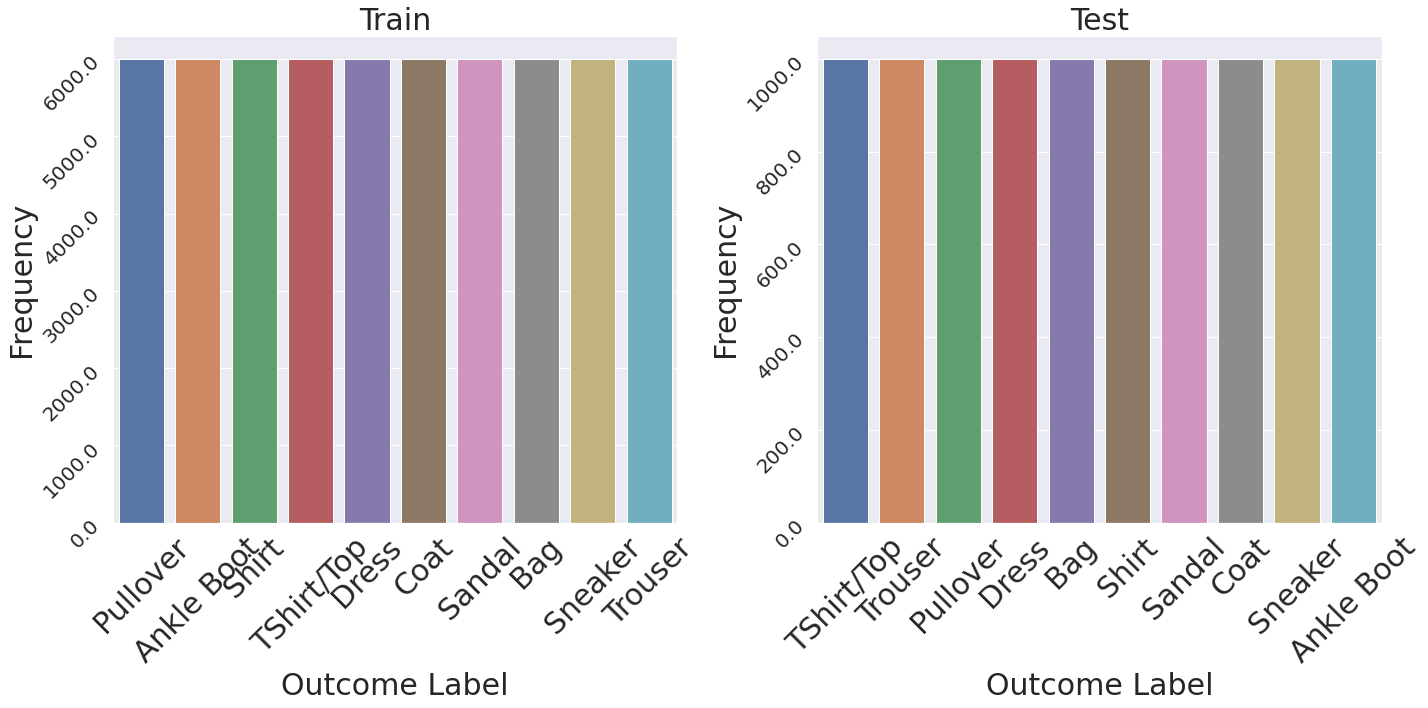

In [ ]:
sns.set_theme(style="darkgrid")

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1 = sns.countplot(x=label_train['category'], data=df_train,ax=ax1)
ax2= sns.countplot(x=label_test['category'], data=label_test,ax=ax2)

fsize=30
ax1.set_xlabel("Outcome Label", fontsize = fsize)
ax1.set_ylabel("Frequency", fontsize = fsize)
ax1.set_title("Train", fontsize = fsize)

ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 30, rotation=45)
ax1.set_yticklabels(ax1.get_yticks(), fontsize = 20, rotation=45)

ax2.set_xlabel("Outcome Label", fontsize = fsize)
ax2.set_ylabel("Frequency", fontsize = fsize)
ax2.set_title("Test", fontsize = fsize)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 30, rotation=45)
ax2.set_yticklabels(ax2.get_yticks(), fontsize = 20, rotation=45)


### T-SNE Plot

In [ ]:
X=df_train.copy()
X = X.drop('label', axis = 1)

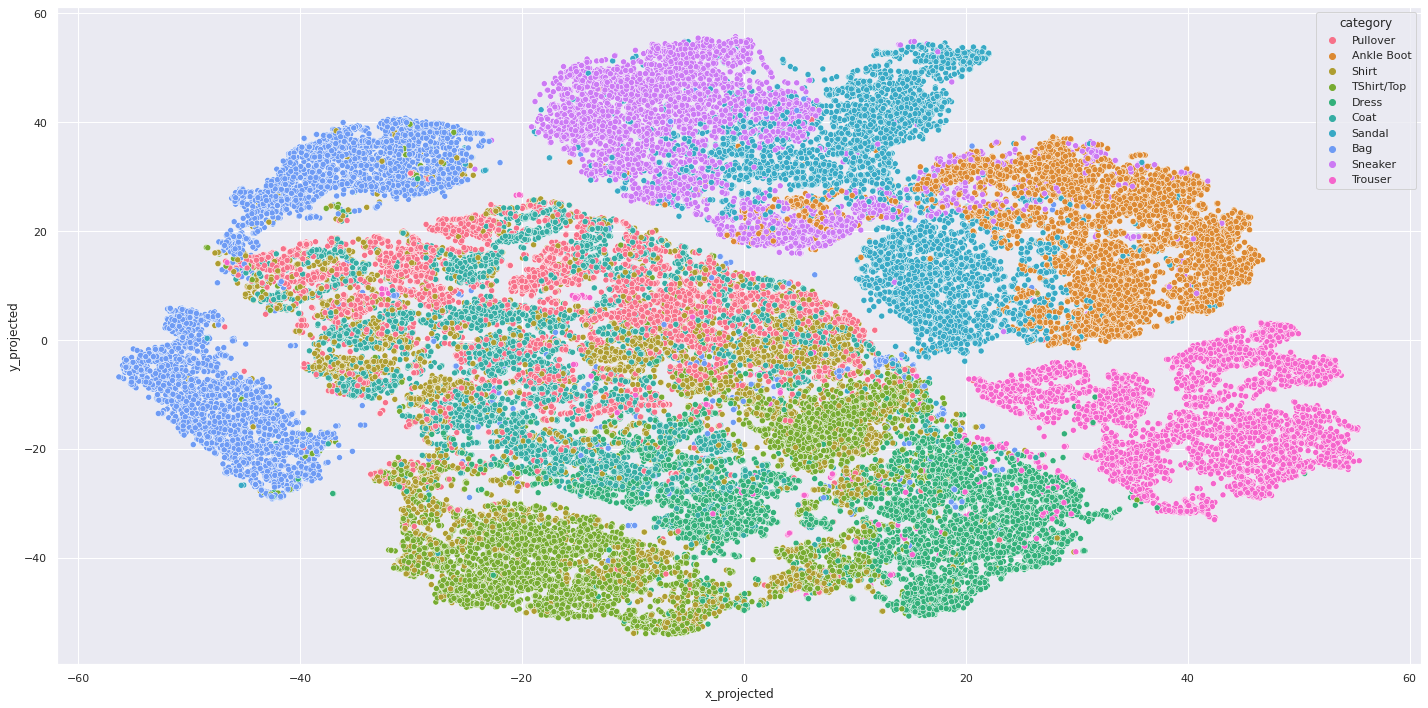

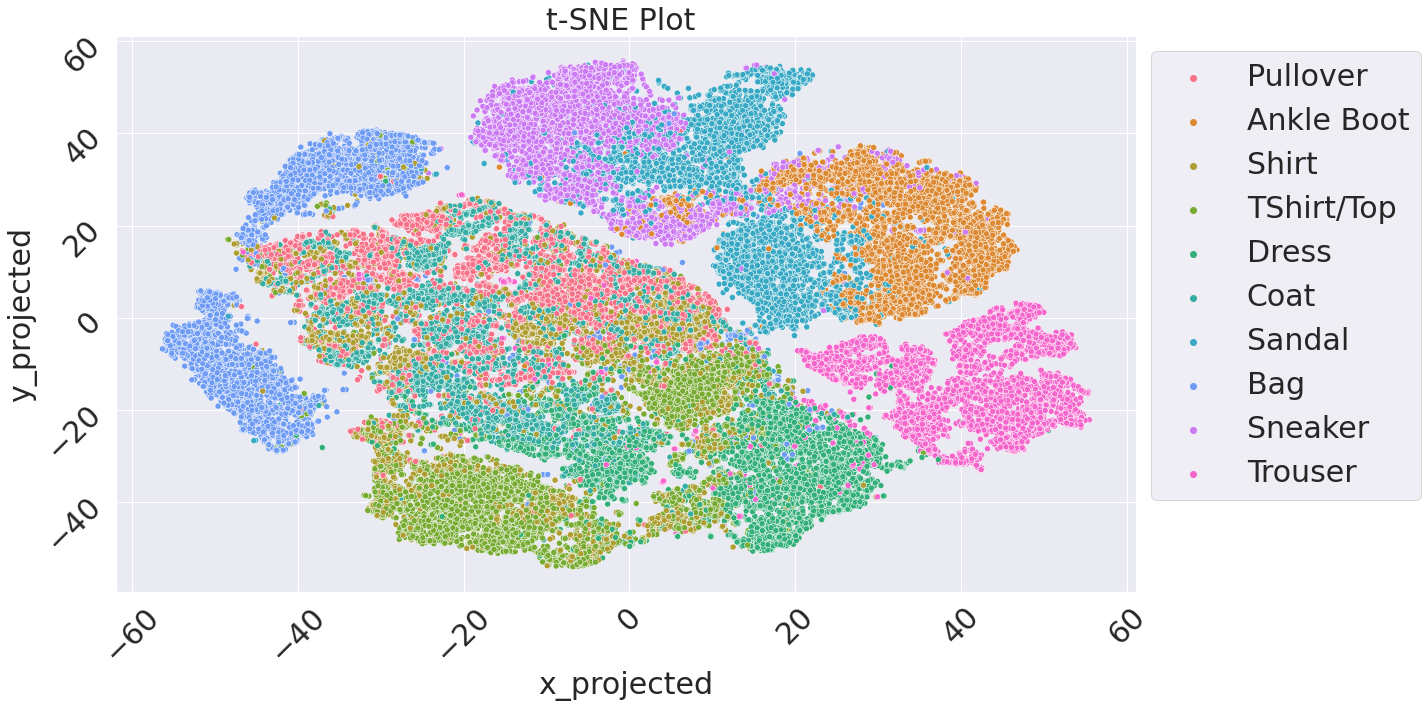

--------------------------------------------


In [ ]:



for perp in [ 30]:
    for rs in [110]:
        fsize=30
        plt.rcParams["figure.figsize"] = [20, 10]
        plt.rcParams["figure.autolayout"] = True
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df_train, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue=label_train['category'], palette=sns.color_palette("husl", 10), data=df_combo)
        fig=plt.figure()
        sns.scatterplot(x='x_projected',y='y_projected', hue=label_train['category'], palette=sns.color_palette("husl", 10), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.xticks(fontsize= 30,rotation=45)
        plt.yticks(fontsize= 30,rotation=45)
        plt.xlabel("x_projected", fontsize = fsize)
        plt.ylabel("y_projected", fontsize = fsize)
        plt.title('t-SNE Plot ', fontsize = fsize)
        plt.legend(bbox_to_anchor=(1,1),prop={'size': 30})
        plt.show()
        
        #fig.savefig('tsne.jpeg')
    print('--------------------------------------------')

## Hierarchical Models 

In [ ]:
X=df_test.copy()
X = X.drop('label', axis = 1)

X_stand=StandardScaler().fit_transform(X)
X_stand.shape

(10000, 784)

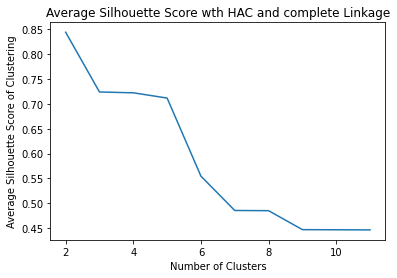

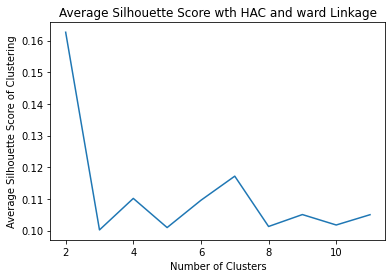

In [ ]:

for link in [ 'complete','ward']:
    avg_ss=[]
    for k in range(2,12):
        #First, designate the HAC linkage function, and the number of clusters you want to extract from the resulting dendrogram
        hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=link)
        Y_pred = hac.fit_predict(X_stand)
        avg_ss.append(silhouette_score(X_stand, Y_pred))
    fig=plt.figure()   
    plt.plot(range(2,12), avg_ss)
    plt.title('Average Silhouette Score wth HAC and %s Linkage'%link)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score of Clustering')
   # fig.savefig('tsne.jpeg')
    plt.show()
    

### Ward Linkage

In [ ]:
hac = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
Y_pred = hac.fit_predict(X_stand)

In [ ]:
label_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

Text(0.5, 1.0, 'Frequency Plot of Predicted Clusters ')

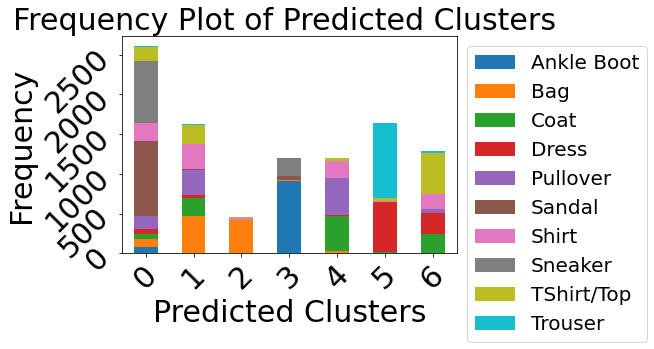

In [ ]:
df_plot=pd.concat([pd.DataFrame(Y_pred),label_test],axis=1)
#df_plot = df_plot.groupby([0, 'category']).size().reset_index().pivot(columns='category', index=0, values=0)
df_plot=df_plot.rename(columns={0 : "predicted_cluster"})

df_plot = df_plot.groupby(['category', 'predicted_cluster']).size().reset_index().pivot(columns='category', index='predicted_cluster', values=0)
fsize=30
df_plot.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
plt.legend(bbox_to_anchor=(1,1),prop={'size': 20})
plt.xticks(fontsize= 30,rotation=45)
plt.yticks(fontsize= 30,rotation=45)
plt.xlabel("Predicted Clusters", fontsize = fsize)
plt.ylabel("Frequency", fontsize = fsize)
plt.title('Frequency Plot of Predicted Clusters ', fontsize = fsize)

In [ ]:
adjusted_rand_score(label_test['label'],Y_pred)

0.31423963346160616

In [ ]:
silhouette_score(X_stand, Y_pred)

0.11716964826793141

### GMM 

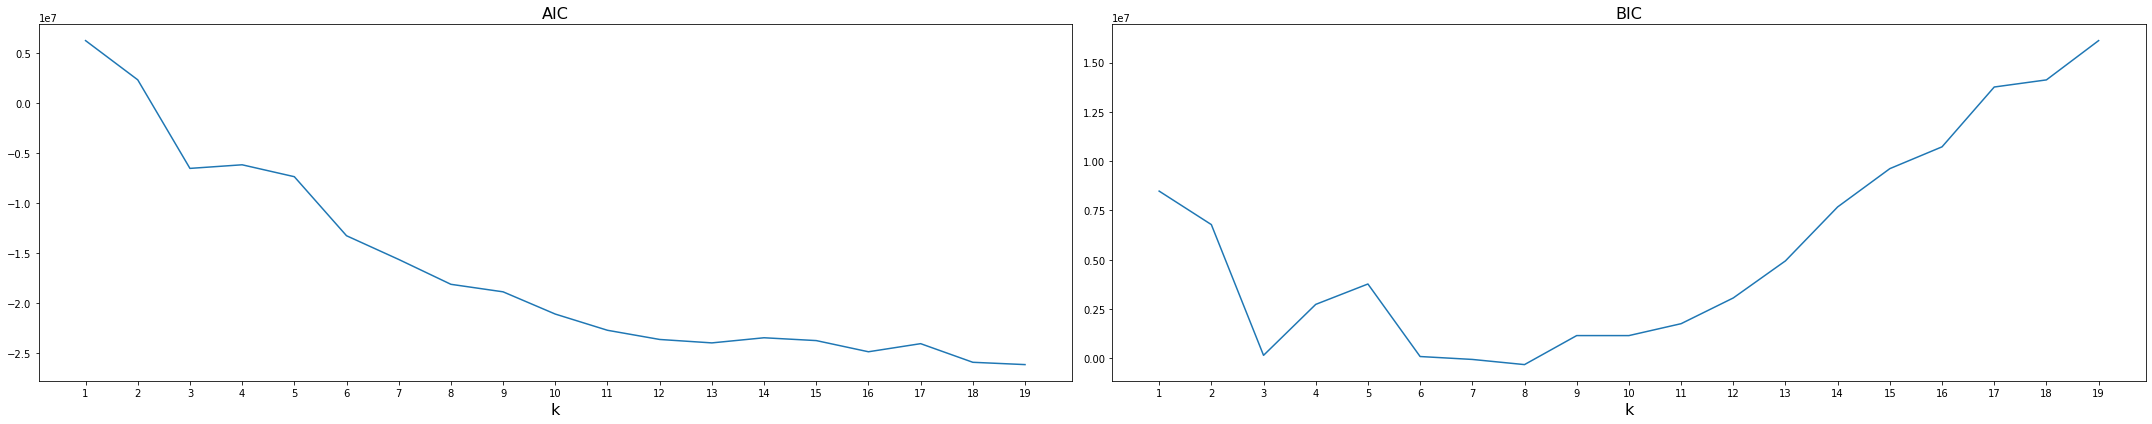

In [ ]:
aics = []
bics = []

for k in range(1, 20):
    gm = GaussianMixture(n_components=k, random_state=101)
    gm.fit(X_stand)
    aics.append(gm.aic(X_stand))
    bics.append(gm.bic(X_stand))

fig, ax = plt.subplots(1, 2, figsize=(30, 6))

ax[0].plot(range(1, 20), aics)
ax[0].set_xticks(range(1, 20))
ax[0].set_xlabel('k', fontsize=16)
ax[0].set_title('AIC', fontsize=16)

ax[1].plot(range(1, 20), bics)
ax[1].set_xticks(range(1, 20))
ax[1].set_xlabel('k', fontsize=16)
ax[1].set_title('BIC', fontsize=16)

plt.show()

In [ ]:
gm2 = GaussianMixture(n_components=8, random_state=101)
gm2.fit(X_stand)

GaussianMixture(n_components=8, random_state=101)

In [ ]:
W=gm2.predict_proba(X)
print(np.shape(W))
W

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(10000, 8)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
cluster_columns=['Cluster %s Membership Score'%(str(i)) for i in range(0,8)]
df_membership=pd.DataFrame(W, columns=cluster_columns)
df_membership.round(4)

,Cluster 0 Membership Score,Cluster 1 Membership Score,Cluster 2 Membership Score,Cluster 3 Membership Score,Cluster 4 Membership Score,Cluster 5 Membership Score,Cluster 6 Membership Score,Cluster 7 Membership Score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
highest_membership_scores=df_membership.T.max()
highest_membership_scores

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Length: 10000, dtype: float64

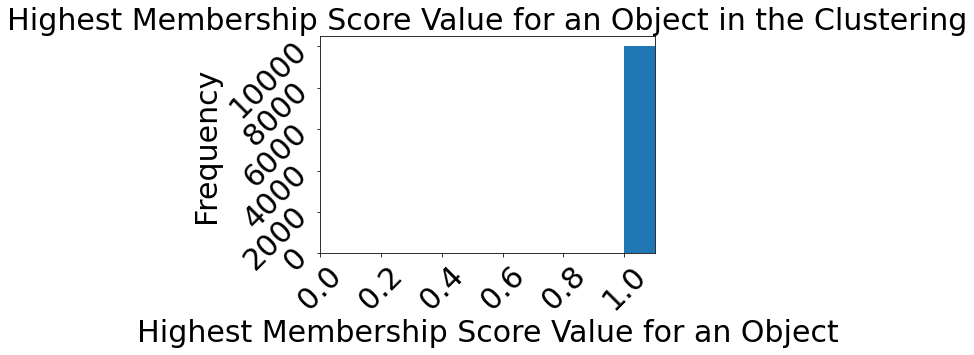

In [ ]:
fsize=30
plt.hist(highest_membership_scores)
plt.xticks(fontsize= 30,rotation=45)
plt.yticks(fontsize= 30,rotation=45)
plt.xlim([0,1.1])
plt.xlabel('Highest Membership Score Value for an Object', fontsize = fsize)
plt.ylabel("Frequency", fontsize = fsize)
plt.title('Highest Membership Score Value for an Object in the Clustering', fontsize = fsize)
plt.show()

In [ ]:
gmm_partition=[df_membership.T[i].argmax() for i in range(0,len(df_membership))]
Y_pred=gmm_partition

Text(0.5, 1.0, 'Frequency Plot of Predicted Clusters ')

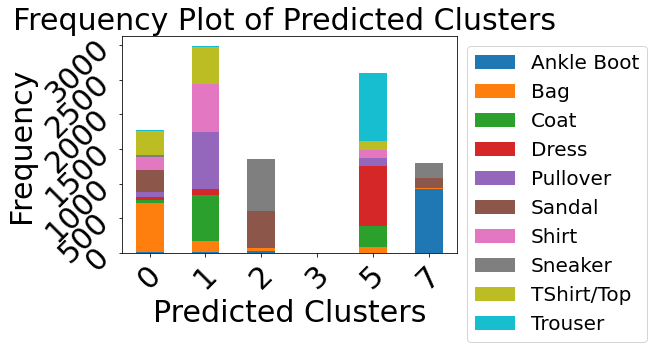

In [ ]:
df_plot2=pd.concat([pd.DataFrame(Y_pred),label_test],axis=1)
#df_plot = df_plot.groupby([0, 'category']).size().reset_index().pivot(columns='category', index=0, values=0)
df_plot2=df_plot2.rename(columns={0 : "predicted_cluster"})
df_plot2 = df_plot2.groupby(['category', 'predicted_cluster']).size().reset_index().pivot(columns='category', index='predicted_cluster', values=0)
fsize=30
df_plot2.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
plt.legend(bbox_to_anchor=(1,1),prop={'size': 20})
plt.xticks(fontsize= 30,rotation=45)
plt.yticks(fontsize= 30,rotation=45)
plt.xlabel("Predicted Clusters", fontsize = fsize)
plt.ylabel("Frequency", fontsize = fsize)
plt.title('Frequency Plot of Predicted Clusters ', fontsize = fsize)

In [ ]:
adjusted_rand_score(label_test['label'],Y_pred)

0.29190535165791337

In [ ]:
silhouette_score(X_stand, Y_pred)

0.015026912076468267

# Multi Class Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
from matplotlib.pyplot import figure
import warnings
from sklearn.manifold import TSNE
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Gaussian Naive Bayes

In [ ]:
data_train = df_train.drop(['label'], axis = 1)
label_train = df_train['label']

data_test = df_test.drop(['label'], axis = 1)
label_test = df_test['label']

**Parameter Tuning**

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
 
#var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.


nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(data_train, label_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.08111308307896872)


**Predicting the response**

In [ ]:


y_train_pred = nbModel_grid.predict(data_train)
y_test_pred = nbModel_grid.predict(data_test)



**Defining Functions for Performance Metrics**

In [ ]:
def performance_metrics (y_true_train,y_true_test,y_train_pred,y_test_pred):

            acc_train = accuracy_score(y_true_train,y_train_pred)
            acc_test = accuracy_score(y_true_test,y_test_pred)
            macro_averaged_precision = metrics.precision_score(y_true_test, y_test_pred, average = 'macro')
            micro_averaged_precision = metrics.precision_score(y_true_test, y_test_pred, average = 'micro')
            macro_averaged_recall = metrics.recall_score(y_true_test, y_test_pred, average = 'macro')
            micro_averaged_recall = metrics.recall_score(y_true_test, y_test_pred, average = 'micro')
            macro_averaged_f1 = metrics.f1_score(y_true_test, y_test_pred, average = 'macro')
            micro_averaged_f1 = metrics.f1_score(y_true_test, y_test_pred, average = 'micro')
            print('Accuracy Train : ', round(acc_train,4))
            print('Accuracy  Test : ', round(acc_test,4))
            print(f"Macro-Averaged Precision score  : {round(macro_averaged_precision,4)}")
            print(f"Micro-Averaged Precision score  : {round(micro_averaged_precision,4)}")
            print(f"Macro-Averaged Recall score  : {round(macro_averaged_recall,4)}")
            print(f"Micro-Averaged Recall score  : {round(micro_averaged_recall,4)}")
            print(f"Macro-Averaged F1 score  : {round(macro_averaged_f1,4)}")
            print(f"Micro-Averaged F1 score  : {round(micro_averaged_f1,4)}")


from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

**Performance Metrics**

In [ ]:
performance_metrics(label_train,label_test,y_train_pred,y_test_pred)

Accuracy Train :  0.676
Accuracy  Test :  0.6775
Macro-Averaged Precision score  : 0.6836
Micro-Averaged Precision score  : 0.6775
Macro-Averaged Recall score  : 0.6775
Micro-Averaged Recall score  : 0.6775
Macro-Averaged F1 score  : 0.6651
Micro-Averaged F1 score  : 0.6775


In [ ]:
roc_auc_dict = roc_auc_score_multiclass(label_test, y_test_pred)
roc_auc_dict

{0: 0.8337777777777777,
 1: 0.9546666666666667,
 2: 0.7022777777777778,
 3: 0.8916666666666667,
 4: 0.8067222222222222,
 5: 0.7126111111111111,
 6: 0.5869444444444444,
 7: 0.936,
 8: 0.8946111111111111,
 9: 0.8890555555555556}

**Confusion Matrix**

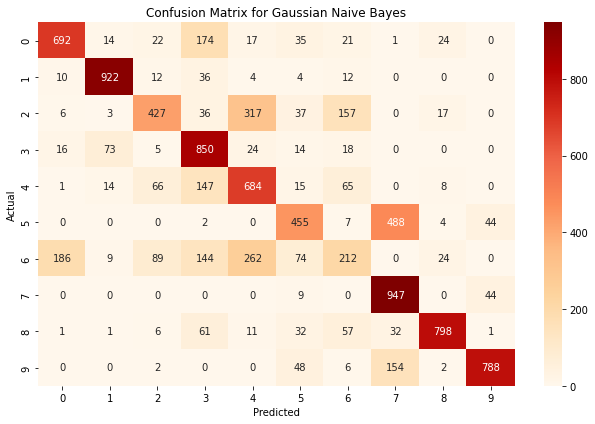

In [ ]:
# Confusion Matrix for Gaussian NB

con_matrix = pd.crosstab(pd.Series(label_test.values.flatten(), name='Actual' ),pd.Series(y_test_pred, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix for Gaussian Naive Bayes")
sns.heatmap(con_matrix, cmap="OrRd", annot=True, fmt='g')
plt.show()

## Random Forest

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,200,300,400]
# Number of features to consider at every split
max_features = ['auto','log2']
# Maximum number of levels in tree
max_depth = [5,10,15,20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [True]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, usin 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, label_train)

print(rf_random.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


**Prediction**

In [ ]:
y_pred_train=rf_random.predict(data_train)
y_pred_test=rf_random.predict(data_test)

**Performance**

In [ ]:
performance_metrics(label_train,label_test,y_pred_train,y_pred_test)



In [ ]:
roc_auc_dict = roc_auc_score_multiclass(label_test, y_pred_test)
roc_auc_dict

In [ ]:
con_matrix = pd.crosstab(pd.Series(label_test.values.flatten(), name='Actual' ),pd.Series(y_pred_test, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix for  Random Forest")
sns.heatmap(con_matrix, cmap="OrRd", annot=True, fmt='g')
plt.show()

## SVM

In [ ]:
# Support Vector Machine

svc = svm.SVC(decision_function_shape='ovo')
svc.fit(data_train, label_train)

y_train_pred = svc.predict(data_train)
y_test_pred = svc.predict(data_test)


In [ ]:
performance_metrics(label_train,label_test,y_train_pred,y_test_pred)

Accuracy Train :  0.911
Accuracy  Test :  0.8921
Macro-Averaged Precision score  : 0.8915
Micro-Averaged Precision score  : 0.8921
Macro-Averaged Recall score  : 0.8921
Micro-Averaged Recall score  : 0.8921
Macro-Averaged F1 score  : 0.8915
Micro-Averaged F1 score  : 0.8921


In [ ]:
roc_auc_dict = roc_auc_score_multiclass(label_test, y_test_pred)
roc_auc_dict

{0: 0.9176666666666666,
 1: 0.9860555555555555,
 2: 0.9025,
 3: 0.9530555555555557,
 4: 0.9252777777777776,
 5: 0.9671111111111111,
 6: 0.8245555555555556,
 7: 0.9668888888888889,
 8: 0.9833888888888889,
 9: 0.9740555555555555}

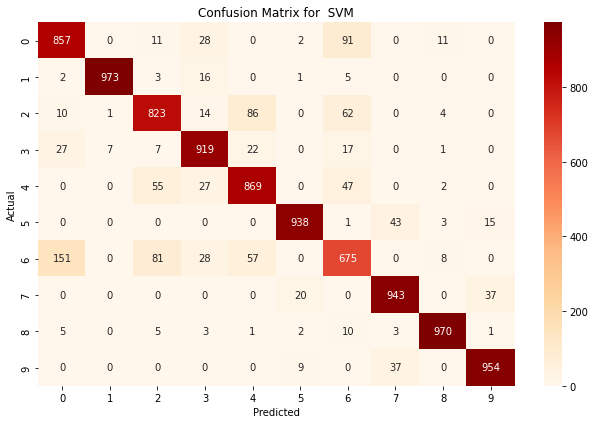

In [ ]:
con_matrix = pd.crosstab(pd.Series(label_test.values.flatten(), name='Actual' ),pd.Series(y_test_pred, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix for  SVM")
sns.heatmap(con_matrix, cmap="OrRd", annot=True, fmt='g')
plt.show()

In [ ]:
# Concatenating train and test data for PCA:

total_data = pd.concat([df_train, df_test], axis = 0)
total_data.drop('label', axis = 1, inplace = True)

In [ ]:
# Extracting the response variable:
y_train = df_train['label']
y_test = df_test['label']

In [ ]:
# Standardization

total_data_X=StandardScaler().fit_transform(total_data)

# Converting to Dataframe 

col_name=['pixel'+str(i) for i in range(1,785)]
total_data = pd.DataFrame(total_data,columns =col_name)

# Separating train and test data:
train_X = total_data.iloc[0:60000, :]
test_X = total_data.iloc[60000:70000, :]

In [ ]:
# Dimensionality Reduction

pca = PCA(n_components= 0.9,copy = True, whiten = False)

X_train = pca.fit_transform(train_X)
X_test = pca.transform(test_X)

print(pca.explained_variance_ratio_)

[0.29011353 0.17727668 0.060227   0.04970272 0.03839289 0.03470997
 0.02344044 0.01913937 0.01343605 0.01310725 0.0098979  0.0091405
 0.00765206 0.00660427 0.00609188 0.00591506 0.00552046 0.0053049
 0.00459959 0.00455534 0.00432823 0.00406103 0.00383469 0.00374221
 0.00361877 0.0035091  0.00333586 0.00318696 0.00309619 0.00295278
 0.00276008 0.00265339 0.00262962 0.0025768  0.0024756  0.00238413
 0.00230075 0.00224349 0.00219128 0.00209739 0.00200786 0.00197572
 0.00194214 0.00183776 0.00175782 0.0017155  0.00168051 0.00163924
 0.00162221 0.00156039 0.00153962 0.00150809 0.00147632 0.00142855
 0.00138375 0.00137028 0.00130995 0.00129031 0.00127057 0.00126083
 0.00122874 0.00120787 0.00118018 0.00116346 0.0011529  0.0011201
 0.00111493 0.00109534 0.00106029 0.00104935 0.00103992 0.0010226
 0.00097369 0.0009554  0.00093832 0.00093564 0.00093271 0.00090589
 0.000892   0.00086959 0.00085515 0.00084408 0.00082857 0.00081828]


In [ ]:
# Visualizing the PCA-explained variations vs no. of components:
import plotly.graph_objects as go
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
fig = go.Figure(data=go.Scatter(x=list(range(1,len(var)+1)), y=var))
fig.update_layout(title='PCA Variance Explained',
                   xaxis_title='# Of Features',
                   yaxis_title='% Variance Explained')
fig.show()

In [ ]:
pcn = X_train.shape[1]

# Creating dataframes from principal components:
X_train = pd.DataFrame(X_train,columns =col_name[0:pcn])
X_test = pd.DataFrame(X_test,columns =col_name[0:pcn])

# **Model** **Evaluation**

We first fit individual models using different machine learning models in the first layer and choose good performing ones to stack up in the meta model.

#### **K-Nearest Neighbors**

In [ ]:
# Fitting KNN with k = 6 obtained through tuning k, on Principal components:

knn2 = KNeighborsClassifier(n_neighbors = 6)
knn2.fit(X_train,y_train)
 
y_train_pred_knn2 = knn2.predict(X_train)
y_test_pred_knn2 = knn2.predict(X_test)

acc_train_knn2 = accuracy_score(y_train,y_train_pred_knn2)
acc_test_knn2 = accuracy_score(y_test,y_test_pred_knn2)

print('Accuracy KNN Train : ', round(acc_train_knn2,4))
print('Accuracy KNN Test : ', round(acc_test_knn2,4))

Accuracy KNN Train :  0.8987
Accuracy KNN Test :  0.8671


In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_knn2,y_test_pred_knn2)

Accuracy Train :  0.8987
Accuracy  Test :  0.8671
Macro-Averaged Precision score  : 0.8675
Micro-Averaged Precision score  : 0.8671
Macro-Averaged Recall score  : 0.8671
Micro-Averaged Recall score  : 0.8671
Macro-Averaged F1 score  : 0.8655
Micro-Averaged F1 score  : 0.8671


#### **Gaussian Naive Bayes**

In [ ]:
# Gaussian Naive Bayes with original features:

NB = GaussianNB()
NB.fit(train_X,y_train)     # train_X is the original data, X_train is the transformed data with first few components

y_train_pred_gnb = NB.predict(train_X)
y_test_pred_gnb = NB.predict(test_X)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_gnb,y_test_pred_gnb)

Accuracy Train :  0.5945
Accuracy  Test :  0.5914
Macro-Averaged Precision score  : 0.6418
Micro-Averaged Precision score  : 0.5914
Macro-Averaged Recall score  : 0.5914
Micro-Averaged Recall score  : 0.5914
Macro-Averaged F1 score  : 0.5627
Micro-Averaged F1 score  : 0.5914


#### **Logistic Regression**

In [ ]:
# Logistic Regression with PCA-transformed features:

lg = LogisticRegression(solver = 'liblinear')
lg.fit(X_train,y_train)

y_train_pred_lr = lg.predict(X_train)
y_test_pred_lr = lg.predict(X_test)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_lr,y_test_pred_lr)

Accuracy Train :  0.8422
Accuracy  Test :  0.8457
Macro-Averaged Precision score  : 0.8432
Micro-Averaged Precision score  : 0.8457
Macro-Averaged Recall score  : 0.8457
Micro-Averaged Recall score  : 0.8457
Macro-Averaged F1 score  : 0.844
Micro-Averaged F1 score  : 0.8457


#### **Support Vector Machine**

In [ ]:
# Support Vector Machine with PCA:

svc = svm.SVC(decision_function_shape='ovo')
svc.fit(X_train, y_train)

y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_svc,y_test_pred_svc)

Accuracy Train :  0.9051
Accuracy  Test :  0.8918
Macro-Averaged Precision score  : 0.8913
Micro-Averaged Precision score  : 0.8918
Macro-Averaged Recall score  : 0.8918
Micro-Averaged Recall score  : 0.8918
Macro-Averaged F1 score  : 0.8913
Micro-Averaged F1 score  : 0.8918


In [ ]:
# Support Vector Machine with original features:

svc2 = svm.SVC(decision_function_shape='ovr')
svc2.fit(train_X, y_train)

y_train_pred_svc2 = svc2.predict(train_X)
y_test_pred_svc2 = svc2.predict(test_X)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_svc2,y_test_pred_svc2)

Accuracy Train :  0.911
Accuracy  Test :  0.8921
Macro-Averaged Precision score  : 0.8915
Micro-Averaged Precision score  : 0.8921
Macro-Averaged Recall score  : 0.8921
Micro-Averaged Recall score  : 0.8921
Macro-Averaged F1 score  : 0.8915
Micro-Averaged F1 score  : 0.8921


#### **Random Forest**

In [ ]:
# Random Forest Classifier with PCA-transformed features and parameters tuned using GridSearchCV:

rfc = RandomForestClassifier(n_estimators = 400, max_features = "log2", max_depth = 15, random_state=42)
rfc.fit(X_train, y_train)

y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)

acc_train_rfc = accuracy_score(y_train,y_train_pred_rfc)
acc_test_rfc = accuracy_score(y_test,y_test_pred_rfc)

print('Accuracy Random Forest Clf Train : ', round(acc_train_rfc,4))
print('Accuracy Random Forest Clf Test : ', round(acc_test_rfc,4))

Accuracy Random Forest Clf Train :  0.9662
Accuracy Random Forest Clf Test :  0.8586


In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_rfc,y_test_pred_rfc)

Accuracy Train :  0.9662
Accuracy  Test :  0.8586
Macro-Averaged Precision score  : 0.8573
Micro-Averaged Precision score  : 0.8586
Macro-Averaged Recall score  : 0.8586
Micro-Averaged Recall score  : 0.8586
Macro-Averaged F1 score  : 0.8564
Micro-Averaged F1 score  : 0.8586


In [ ]:
# Random Forest Classifier with original features:

rfc_2 = RandomForestClassifier(n_estimators = 400, max_features = "log2", max_depth = 15, random_state=42)
rfc_2.fit(train_X, y_train)

y_train_pred_rfc2 = rfc_2.predict(train_X)
y_test_pred_rfc2 = rfc_2.predict(test_X)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_rfc2,y_test_pred_rfc2)

Accuracy Train :  0.957
Accuracy  Test :  0.8713
Macro-Averaged Precision score  : 0.8703
Micro-Averaged Precision score  : 0.8713
Macro-Averaged Recall score  : 0.8713
Micro-Averaged Recall score  : 0.8713
Macro-Averaged F1 score  : 0.8689
Micro-Averaged F1 score  : 0.8713


#### **Light GBM**

In [ ]:
# Fitting Light GBM on PCA-transformed features and tuned parameters:

lgbm =lgb.LGBMClassifier( num_leaves= 256, min_child_samples= 70, objective= 'multiclass',max_depth= 9,
          learning_rate= 0.07, \
          boosting_type= "gbdt", \
          subsample_freq= 3, \
          subsample= 0.9, \
          bagging_seed= 11, \
          verbosity= -1, \
          reg_alpha= 0.3, \
          reg_lambda= 0.3, \
          colsample_bytree= 0.9, n_estimators=400, n_jobs=-1)

lgbm.fit(X_train, y_train)

y_train_pred_lgb = lgbm.predict(X_train)
y_test_pred_lgb = lgbm.predict(X_test)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_lgb,y_test_pred_lgb)

Accuracy Train :  1.0
Accuracy  Test :  0.8924
Macro-Averaged Precision score  : 0.892
Micro-Averaged Precision score  : 0.8924
Macro-Averaged Recall score  : 0.8924
Micro-Averaged Recall score  : 0.8924
Macro-Averaged F1 score  : 0.892
Micro-Averaged F1 score  : 0.8924


In [ ]:
# Light GBM with original features:

lgbm2 =lgb.LGBMClassifier(num_leaves= 256, min_child_samples= 70, objective= 'multiclass',max_depth= 9,
          learning_rate= 0.07, \
          boosting_type= "gbdt", \
          subsample_freq= 3, \
          subsample= 0.9, \
          bagging_seed= 11, \
          verbosity= -1, \
          reg_alpha= 0.3, \
          reg_lambda= 0.3, \
          colsample_bytree= 0.9, n_estimators=400, n_jobs=-1)

lgbm2.fit(train_X, y_train)

y_train_pred_lgb2 = lgbm2.predict(train_X)
y_test_pred_lgb2 = lgbm2.predict(test_X)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_lgb2,y_test_pred_lgb2)

Accuracy Train :  1.0
Accuracy  Test :  0.9168
Macro-Averaged Precision score  : 0.9163
Micro-Averaged Precision score  : 0.9168
Macro-Averaged Recall score  : 0.9168
Micro-Averaged Recall score  : 0.9168
Macro-Averaged F1 score  : 0.9163
Micro-Averaged F1 score  : 0.9168


### **Ensemble Model (Stacking)**

In [ ]:
# New data with inputs from previous models:
train_s2 = pd.concat([pd.DataFrame(y_train_pred_knn2), pd.DataFrame(y_train_pred_svc2),
                       pd.DataFrame(y_train_pred_rfc2), pd.DataFrame(y_train_pred_lgb2)], axis = 1)


In [ ]:
# New testing data:
test_s2 = pd.concat([pd.DataFrame(y_test_pred_knn2), pd.DataFrame(y_test_pred_svc2),
                       pd.DataFrame(y_test_pred_rfc2), pd.DataFrame(y_test_pred_lgb2)], axis = 1)

In [ ]:
# Ensemble model with SVM as meta-model:

svc_s2 = svm.SVC(decision_function_shape='ovo')
svc_s2.fit(train_s2, y_train)

y_train_pred_svc_s2 = svc_s2.predict(train_s2)
y_test_pred_svc_s2 = svc_s2.predict(test_s2)


In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_svc_s2,y_test_pred_svc_s2)

Accuracy Train :  0.9998
Accuracy  Test :  0.9147
Macro-Averaged Precision score  : 0.9142
Micro-Averaged Precision score  : 0.9147
Macro-Averaged Recall score  : 0.9147
Micro-Averaged Recall score  : 0.9147
Macro-Averaged F1 score  : 0.9142
Micro-Averaged F1 score  : 0.9147


In [ ]:
#Ensemble model with meta-model as RandomForest fitted on new features:

rfc_s2 = RandomForestClassifier(n_estimators = 400, max_features = "log2", max_depth = 15, random_state=42)
rfc_s2.fit(train_s2, y_train)

y_train_pred_rfc_s2 = rfc_s2.predict(train_s2)
y_test_pred_rfc_s2 = rfc_s2.predict(test_s2)

In [ ]:
# Performance Metrics:
performance_metrics(y_train,y_test,y_train_pred_rfc_s2,y_test_pred_rfc_s2)

Accuracy Train :  1.0
Accuracy  Test :  0.9154
Macro-Averaged Precision score  : 0.915
Micro-Averaged Precision score  : 0.9154
Macro-Averaged Recall score  : 0.9154
Micro-Averaged Recall score  : 0.9154
Macro-Averaged F1 score  : 0.915
Micro-Averaged F1 score  : 0.9154


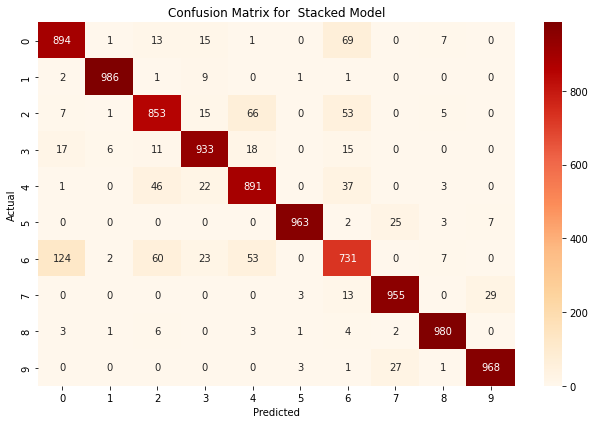

In [ ]:
con_matrix = pd.crosstab(pd.Series(label_test.values.flatten(), name='Actual' ),pd.Series(y_test_pred_rfc_s2, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix for  Stacked Model")
sns.heatmap(con_matrix, cmap="OrRd", annot=True, fmt='g')
plt.show()

In [ ]:
roc_auc_dict = roc_auc_score_multiclass(label_test, y_test_pred_rfc_s2)
roc_auc_dict

{0: 0.9384444444444445,
 1: 0.9923888888888889,
 2: 0.9188888888888889,
 3: 0.9618333333333333,
 4: 0.9376666666666666,
 5: 0.9810555555555556,
 6: 0.8546666666666666,
 7: 0.9745,
 8: 0.9885555555555554,
 9: 0.982}

By implementing Stacking on simple models, we attain an accuracy of 91.5%.